In [ ]:
!pip install pystan
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

In [ ]:
import pandas as pd

import datetime as dt
from fbprophet import Prophet
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/2000-2003_SW42_meanQ.xlsx', sheet_name=0)

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
df.head()

,DATE,Q (m3/s-1)
0,2000-01-31,293.814843
1,2000-02-29,280.294503
2,2000-03-31,303.440859
3,2000-04-30,358.486772
4,2000-05-31,453.635739


In [ ]:
df.dtypes

DATE          datetime64[ns]
Q (m3/s-1)           float64
dtype: object

In [ ]:
df["DATE"] = df["DATE"].astype('datetime64[ns]')

In [ ]:
df.dtypes

DATE          datetime64[ns]
Q (m3/s-1)           float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        48 non-null     datetime64[ns]
 1   Q (m3/s-1)  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [ ]:
df.head()

,DATE,Q (m3/s-1)
0,2000-01-31,293.814843
1,2000-02-29,280.294503
2,2000-03-31,303.440859
3,2000-04-30,358.486772
4,2000-05-31,453.635739


In [ ]:
#df.drop(['Avg Water Level(m) ','SL'], axis =1, inplace=True)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2000-01-31,293.814843
1,2000-02-29,280.294503
2,2000-03-31,303.440859
3,2000-04-30,358.486772
4,2000-05-31,453.635739


In [ ]:
df = df[df['ds'].notna()]
df.head()

,ds,y
0,2000-01-31,293.814843
1,2000-02-29,280.294503
2,2000-03-31,303.440859
3,2000-04-30,358.486772
4,2000-05-31,453.635739


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=48,freq='M')

In [ ]:

forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-31,33.350672,209.903528,399.327387,33.350672,33.350672,271.977215,271.977215,271.977215,533.662169,533.662169,533.662169,-261.684954,-261.684954,-261.684954,0.0,0.0,0.0,305.327887
1,2000-02-29,31.993111,197.485890,390.371459,31.993111,31.993111,263.289656,263.289656,263.289656,533.662169,533.662169,533.662169,-270.372513,-270.372513,-270.372513,0.0,0.0,0.0,295.282767
2,2000-03-31,30.541926,215.087618,400.422820,30.541926,30.541926,278.320869,278.320869,278.320869,533.662169,533.662169,533.662169,-255.341301,-255.341301,-255.341301,0.0,0.0,0.0,308.862794
3,2000-04-30,29.137553,259.835251,448.670969,29.137553,29.137553,324.538451,324.538451,324.538451,533.662169,533.662169,533.662169,-209.123718,-209.123718,-209.123718,0.0,0.0,0.0,353.676003
4,2000-05-31,27.686367,354.059581,545.661735,27.686367,27.686367,422.290648,422.290648,422.290648,533.662169,533.662169,533.662169,-111.371521,-111.371521,-111.371521,0.0,0.0,0.0,449.977015


In [ ]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
forecast.tail()

,ds,yhat,yhat_lower,yhat_upper
91,2007-08-31,1014.625264,921.071878,1112.168338
92,2007-09-30,915.509298,816.251449,1012.725000
93,2007-10-31,799.370679,697.007225,901.208133
94,2007-11-30,525.284340,418.788476,627.049033
95,2007-12-31,429.399361,338.001351,542.675595


In [ ]:
df.y.max()

1056.224319394614

In [ ]:
df.y.min()

280.2945026569248

In [ ]:
forecast.yhat.max()

1037.8946208256589

In [ ]:
forecast.yhat.min()

284.148250111072

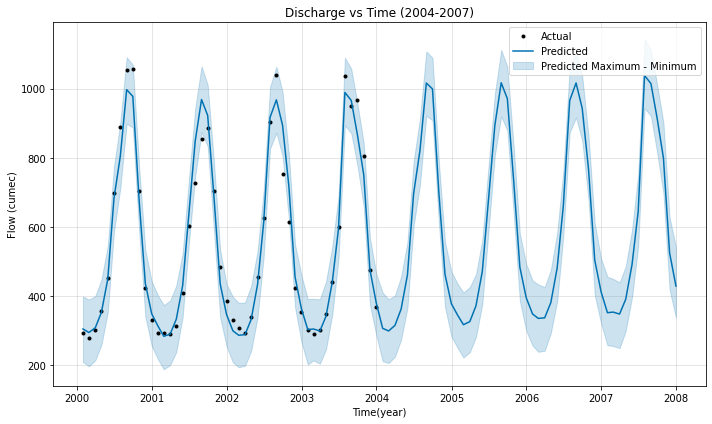

In [ ]:
from matplotlib import pyplot
model.plot(forecast)
pyplot.title("Discharge vs Time (2004-2007)")
pyplot.legend(["Actual","Predicted" ,"Predicted Maximum - Minimum"])
pyplot.xlabel('Time(year)')
pyplot.ylabel('Flow (cumec)')
#pyplot.figure (figsize = (16,8))
#yvalue= forecast["yhat"]
#pyplot.yticks(np.arange(min(yhat, max(yhat)+50, 50.0))
pyplot.tight_layout()
pyplot.savefig('MonthlyPredic_2004-2007_SW42.jpg')
#'SW7.5.jpg',dpi=500
pyplot.show()

In [ ]:
forecast.to_excel("2004-2007_SW42_Prediction.xlsx")

In [ ]:
forecast_new = forecast[forecast.index.isin(df.index)]

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error (df['y'], forecast_new['yhat'], squared=False)

47.55496507687968